# Option Valuation using Numerical Methods
## A Python Programming Approach

Intro to options, explain call and put, explain vanilla (european/american), exotic (asian).  Why do we need to use numerical methods? 3 schemes used here: binomial, crank nicolson, monte carlo

There are many different kinds of assets traded in modern financial markets, nearly all falling within one of the five main categories of stock, bond, commodity, currency, or derivative.  Most folks have a basic understanding of stocks (equity in a business) and bonds (financial contracts issued by the government), and those who are more economically savvy may also be familiar with the trade of commodities (goods such as gold, oil, or grain) and currencies (investments in money, both foreign and domestic).  However, few individuals outside of the financial and academic worlds know much about derivatives.  A derivative is a financial instrument whose value is <em>derived</em> from some other asset such as a stock or commodity. To quote the English mathematician, Ian Stewart, 
<br><br>
<em style="text-align: center;">“Since the turn of the century the greatest source of growth in the financial sector has been in financial instruments known as derivatives.  Derivatives are not money, nor are they investments in stocks or shares.  They are investments in investments, promises about promises… This is finance in cloud cuckoo land, yet it had become the standard practice of the world’s banking system.”</em>
<br><br>
Mr. Stewart certainly a rather sour view on derivatives, but his words also help describes their importance in today’s financial landscape.   In this module,  we will learn about some basic derivatives, how they can be characterized mathematically, and how their value can be estimated using different numerical schemes.

## Keeping Our Options Open

Perhaps the most common derivative is the option, in which the owner of the option has the right to <em>buy </em>the underlying asset at a specific price by a some specified date (this is called a <strong>call</strong>) or the owner has the right to <em>sell</em> underlying asset at a specific price and date (this is called a <strong>put</strong>).  The price specified in the option contract is called the strike price and the date is simply referred to as the expiration date.  For the time being, we will consider only European options, a style of option whereby the owner may only exercise the option (that is, buy or sell the underlying asset) at the expiration date and no sooner.  Letting $K$ be the strike price and $S$ be the value of the underlying asset, the payoff of an option, $V$, at expiration time can be characterized as

$$V_{call} =  \textrm{max}(S - K, 0)$$
$$V_{put} =  \textrm{max}(0, K - S)$$.

The payoffs are described this way because if the owner does not stand to make money by exercising the option, they will opt to simply let it expire and may choose to buy or sell the asset at the market price, $S$, thereby having a payoff of $0. <br><br>


Now let us put oursleves in the shoes of a trader who is considering wether or not to buy (and thus become the owner of) a certain option.  We know the terms of the contract, that is the strike price and time of expiration.  We also know some facts about the current state of the market including the present value of the asset, the risk-free interest rate (i.e. how much interest money would acrue sitting in a bank), and the level of volatility in the market.  Knowing all of this, what can we calculate to be the fair price of the option? <br>

As it turns out, this is no simple task. Luckily for us, in 1973 two economists named Fischer Black and Myron Scholes (with the help of a third economist, Robert Merton) derived an equation describing the price of an option over time.  The equation is

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$$

where $t$ is time, $\sigma$ is volatility, and $r$ is the risk-free interest rate.  This is pretty exciting stuff and the group was awarded the Nobel Prize in Economics in 1997 for their work.  For our purposes, we must note that the Black-Scholes equation has an analytic solution for European puts and calls, called the Black-Scholes formula and it is as follows:


$$V(s,t) = \epsilon S\Phi(\epsilon d1) - \epsilon Ke^{-r(T-t)}\Phi(\epsilon d2)$$
where $$ d1 = \frac{\ln(S/K)+(T-t)(r-\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$ d2 = \frac{\ln(S/K)+(T-t)(r+\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$\Phi(\zeta) = \frac{1}{2\pi}\int_{-\infty}^\zeta e^{-\eta^2/2}d\eta $$<br>
$$\epsilon = \bigg\{{1 \textrm{     for a call} \atop -1 \textrm{     for a put}} $$

Here, $T$ is the time of expiry and $V(s,t)$ is the value of the option at any time $t$. Armed with this formula, let us return to the issue at hand: valuing an option.  Let us suppose that we know the option is a call with strike price $K = \$40$, expiration $T = 0.5 \textrm{ months}$, and we know the market has a risk-free interest rate $r = 0.1$ and a volatility $\sigma = 0.25$.  Using Python and the Black-Scholes formula, the fair price for the option can be calculated for a range of possible current asset prices

In [100]:
#Import necessary libraries and functions
import numpy as np
from scipy.stats import norm #Phi() is the normal CDF

#Parameters
K = 40 #strike price
T = 0.5 #expiration time
r = 0.1 #interest rate
sigma = 0.25 #volatility

S = np.linspace(1, 100,100) #array of possible current asset prices

In [116]:
def bs_formula(type, S, K, T, r, sigma):
    if type == "C":
        eps = 1
    elif type == "P":
        eps = -1
    #V = np.zeros_like(S)
    d1 = (np.log(S/K) + T*(r + 0.5*sigma**2))/sigma*np.sqrt(T)
    #d2 = (np.log(S/K) + T*(r - 0.5*sigma**2))/sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    V = eps*S*norm.cdf(eps*d1) - eps*K*np.exp(-r*T)*norm.cdf(eps*d2)
    V = np.clip(V, 0, np.inf)
    return V

In [117]:
V_call = bs_formula("C", S, K, T, r, sigma)
V_put = bs_formula("P", S, K, T, r, sigma)

In [118]:
print(V_call[44])
print(V_put[44])
S[44]

7.29534867933
0.34452565936


45.0

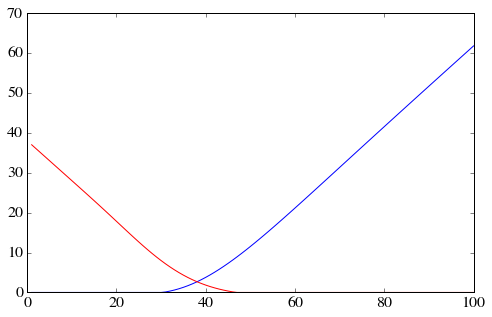

In [120]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(S,V_call,color='blue')
pyplot.plot(S,V_put,color='red')